In [1]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 6)

print("=" * 60)
print("✅ LIBRARIES IMPORTED SUCCESSFULLY!")
print("=" * 60)
print(f"Pandas: {pd.__version__}")
print(f"NumPy: {np.__version__}")
print("=" * 60)

✅ LIBRARIES IMPORTED SUCCESSFULLY!
Pandas: 1.5.3
NumPy: 1.24.3


In [2]:
# Cell 2: Load Data
df = pd.read_csv('../data/raw/grocery_sales.csv')

print("=" * 60)
print("📊 DATASET LOADED")
print("=" * 60)
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Date Range: {df['date'].min()} to {df['date'].max()}")
print("=" * 60)

# Display first few rows
df.head(10)

📊 DATASET LOADED
Shape: 182,500 rows × 20 columns
Memory: 86.54 MB
Date Range: 2023-01-01 to 2024-12-30


,date,year,month,day,day_of_week,day_name,is_weekend,is_holiday,store_id,store_type,store_size,item_id,product_name,category,perishability_days,base_price,price,on_promotion,sales,revenue
0,2023-01-01,2023,1,1,6,Sunday,1,1,1,Rural,Small,1,Baker_1,Bakery,2,6.75,6.75,0,55,371.45
1,2023-01-02,2023,1,2,0,Monday,0,0,1,Rural,Small,1,Baker_1,Bakery,2,6.75,6.75,0,45,303.91
2,2023-01-03,2023,1,3,1,Tuesday,0,0,1,Rural,Small,1,Baker_1,Bakery,2,6.75,6.75,0,60,405.21
3,2023-01-04,2023,1,4,2,Wednesday,0,0,1,Rural,Small,1,Baker_1,Bakery,2,6.75,5.40,1,64,345.78
4,2023-01-05,2023,1,5,3,Thursday,0,0,1,Rural,Small,1,Baker_1,Bakery,2,6.75,5.40,1,85,459.24
5,2023-01-06,2023,1,6,4,Friday,0,0,1,Rural,Small,1,Baker_1,Bakery,2,6.75,6.75,0,65,438.98
6,2023-01-07,2023,1,7,5,Saturday,1,0,1,Rural,Small,1,Baker_1,Bakery,2,6.75,6.75,0,71,479.50
7,2023-01-08,2023,1,8,6,Sunday,1,0,1,Rural,Small,1,Baker_1,Bakery,2,6.75,6.75,0,49,330.93
8,2023-01-09,2023,1,9,0,Monday,0,0,1,Rural,Small,1,Baker_1,Bakery,2,6.75,6.75,0,59,398.46
9,2023-01-10,2023,1,10,1,Tuesday,0,0,1,Rural,Small,1,Baker_1,Bakery,2,6.75,6.75,0,48,324.17


In [3]:
# Cell 3: Dataset Information
print("📋 DATASET INFORMATION")
print("=" * 60)
df.info()

📋 DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182500 entries, 0 to 182499
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   date                182500 non-null  object 
 1   year                182500 non-null  int64  
 2   month               182500 non-null  int64  
 3   day                 182500 non-null  int64  
 4   day_of_week         182500 non-null  int64  
 5   day_name            182500 non-null  object 
 6   is_weekend          182500 non-null  int64  
 7   is_holiday          182500 non-null  int64  
 8   store_id            182500 non-null  int64  
 9   store_type          182500 non-null  object 
 10  store_size          182500 non-null  object 
 11  item_id             182500 non-null  int64  
 12  product_name        182500 non-null  object 
 13  category            182500 non-null  object 
 14  perishability_days  182500 non-null  int64  
 15  base_price  

In [4]:
# Cell 4: Missing Values Check
print("🔍 MISSING VALUES CHECK")
print("=" * 60)
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✅ No missing values found!")
else:
    print(missing[missing > 0])
print("=" * 60)

🔍 MISSING VALUES CHECK
✅ No missing values found!


In [5]:
# Cell 5: Statistical Summary
print("📊 STATISTICAL SUMMARY")
print("=" * 60)
df.describe()

📊 STATISTICAL SUMMARY


,year,month,day,day_of_week,is_weekend,is_holiday,store_id,item_id,perishability_days,base_price,price,on_promotion,sales,revenue
count,182500.000000,182500.000000,182500.000000,182500.000000,182500.000000,182500.000000,182500.000000,182500.000000,182500.000000,182500.000000,182500.000000,182500.000000,182500.000000,182500.000000
mean,2023.500000,6.512329,15.717808,3.000000,0.286301,0.019178,3.000000,25.500000,3.720000,5.293800,5.188630,0.100373,118.940236,584.801333
std,0.500001,3.445950,8.791822,2.003427,0.452033,0.137151,1.414217,14.430909,1.755453,3.230843,3.190609,0.300497,53.070602,392.859030
min,2023.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.100000,0.880000,0.000000,21.000000,41.900000
25%,2023.000000,4.000000,8.000000,1.000000,0.000000,0.000000,2.000000,13.000000,3.000000,3.440000,3.320000,0.000000,81.000000,317.420000
50%,2023.500000,7.000000,16.000000,3.000000,0.000000,0.000000,3.000000,25.500000,3.000000,4.850000,4.790000,0.000000,109.000000,490.040000
75%,2024.000000,10.000000,23.000000,5.000000,1.000000,0.000000,4.000000,38.000000,5.000000,5.710000,5.710000,0.000000,145.000000,746.620000
max,2024.000000,12.000000,31.000000,6.000000,1.000000,1.000000,5.000000,50.000000,7.000000,16.910000,16.910000,1.000000,591.000000,4530.890000


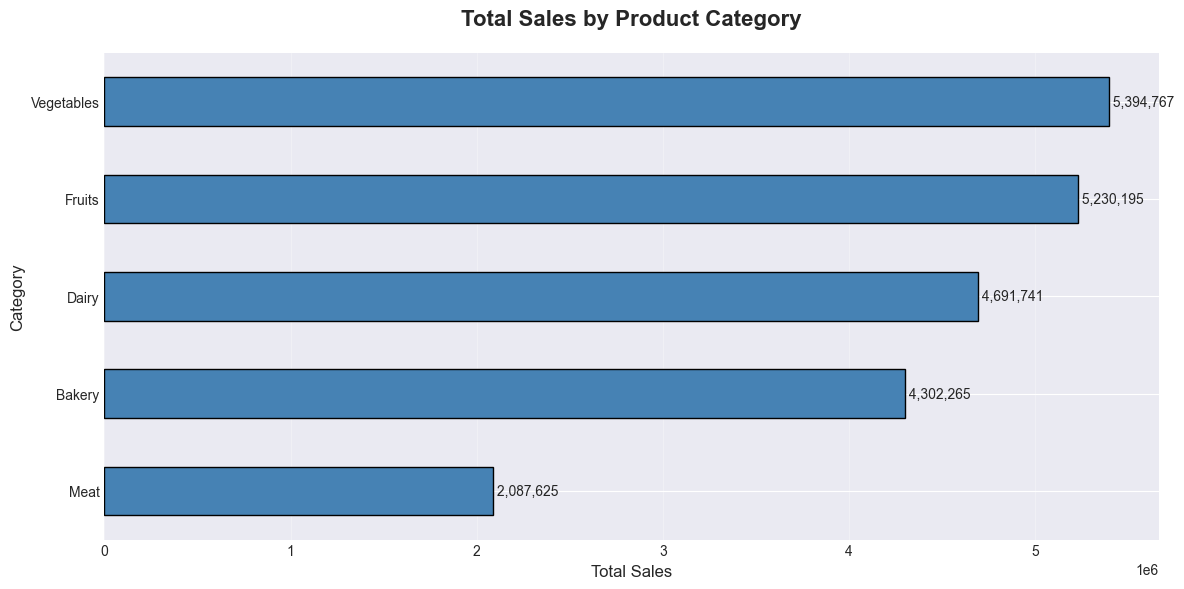


🏆 Top Category: Vegetables with 5,394,767 total sales


In [6]:
# Cell 6: Sales by Category
plt.figure(figsize=(12, 6))

category_sales = df.groupby('category')['sales'].sum().sort_values(ascending=True)

category_sales.plot(kind='barh', color='steelblue', edgecolor='black')
plt.title('Total Sales by Product Category', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.grid(axis='x', alpha=0.3)

# Add values on bars
for i, v in enumerate(category_sales):
    plt.text(v, i, f' {v:,.0f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print(f"\n🏆 Top Category: {category_sales.idxmax()} with {category_sales.max():,.0f} total sales")

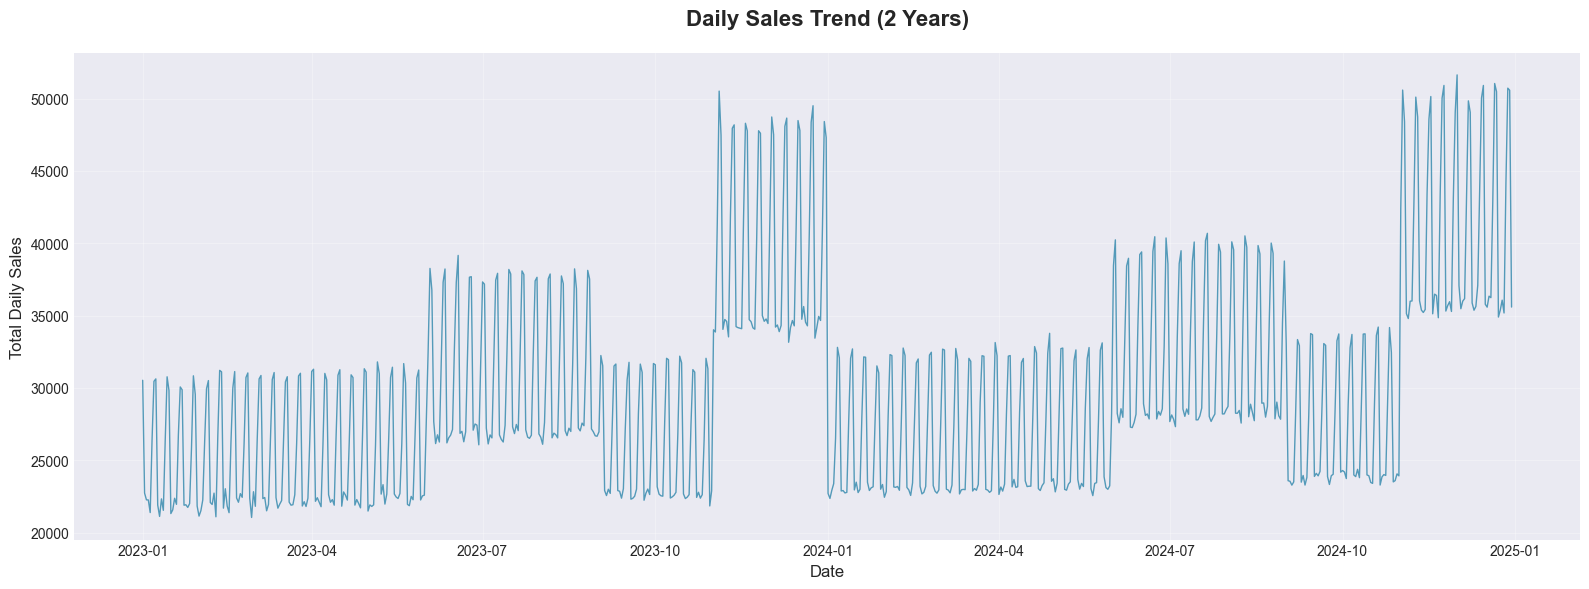

📈 Average Daily Sales: 29,735
📈 Peak Daily Sales: 51,636
📉 Lowest Daily Sales: 21,047


In [7]:
# Cell 7: Daily Sales Trend
df['date'] = pd.to_datetime(df['date'])
daily_sales = df.groupby('date')['sales'].sum().reset_index()

plt.figure(figsize=(16, 6))
plt.plot(daily_sales['date'], daily_sales['sales'], linewidth=1, alpha=0.8, color='#2E86AB')
plt.title('Daily Sales Trend (2 Years)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Daily Sales', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"📈 Average Daily Sales: {daily_sales['sales'].mean():,.0f}")
print(f"📈 Peak Daily Sales: {daily_sales['sales'].max():,.0f}")
print(f"📉 Lowest Daily Sales: {daily_sales['sales'].min():,.0f}")

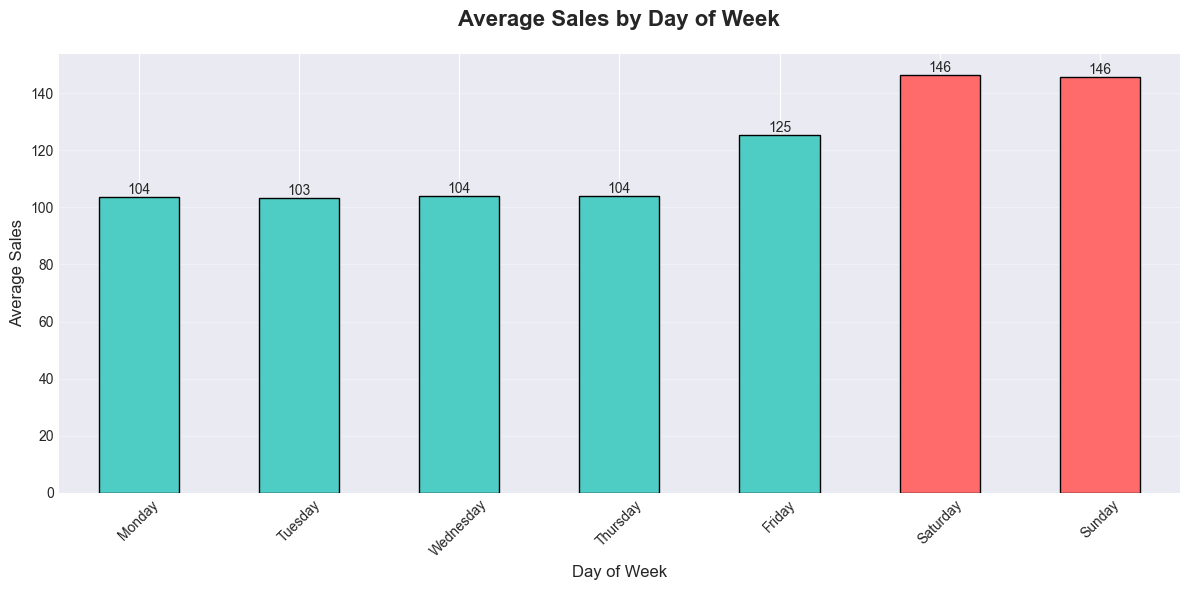


🏆 Best Day: Saturday (Avg: 146)
📉 Worst Day: Tuesday (Avg: 103)


In [8]:
# Cell 8: Sales by Day of Week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_sales = df.groupby('day_name')['sales'].mean().reindex(day_order)

plt.figure(figsize=(12, 6))
colors = ['#FF6B6B' if day in ['Saturday', 'Sunday'] else '#4ECDC4' for day in day_order]
dow_sales.plot(kind='bar', color=colors, edgecolor='black')
plt.title('Average Sales by Day of Week', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add values on bars
for i, v in enumerate(dow_sales):
    plt.text(i, v, f'{v:.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print(f"\n🏆 Best Day: {dow_sales.idxmax()} (Avg: {dow_sales.max():.0f})")
print(f"📉 Worst Day: {dow_sales.idxmin()} (Avg: {dow_sales.min():.0f})")

💰 PROMOTION IMPACT ANALYSIS
                    mean       sum   count
No Promotion  112.128138  18409422  164182
On Promotion  179.996233   3297171   18318

📈 Promotion Lift: 60.5%
✅ Promotions increase sales by 60.5% on average!


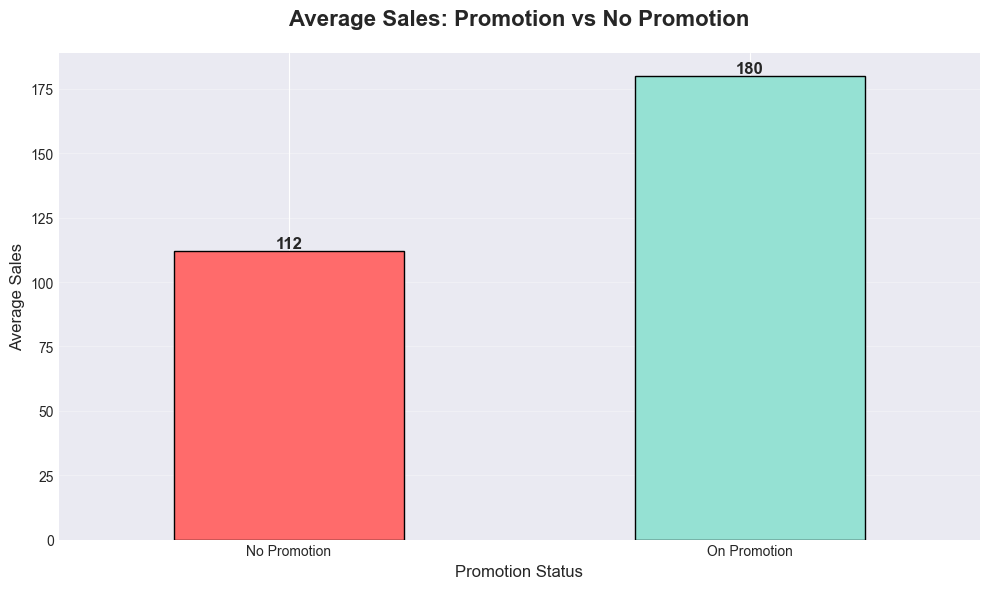

In [9]:
# Cell 9: Promotion Impact Analysis
promo_comparison = df.groupby('on_promotion')['sales'].agg(['mean', 'sum', 'count'])
promo_comparison.index = ['No Promotion', 'On Promotion']

print("💰 PROMOTION IMPACT ANALYSIS")
print("=" * 60)
print(promo_comparison)
print("=" * 60)

# Calculate lift
lift = ((promo_comparison.loc['On Promotion', 'mean'] / 
         promo_comparison.loc['No Promotion', 'mean']) - 1) * 100

print(f"\n📈 Promotion Lift: {lift:.1f}%")
print(f"✅ Promotions increase sales by {lift:.1f}% on average!")

# Visualization
plt.figure(figsize=(10, 6))
promo_comparison['mean'].plot(kind='bar', color=['#FF6B6B', '#95E1D3'], edgecolor='black')
plt.title('Average Sales: Promotion vs No Promotion', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Promotion Status', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate(promo_comparison['mean']):
    plt.text(i, v, f'{v:.0f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

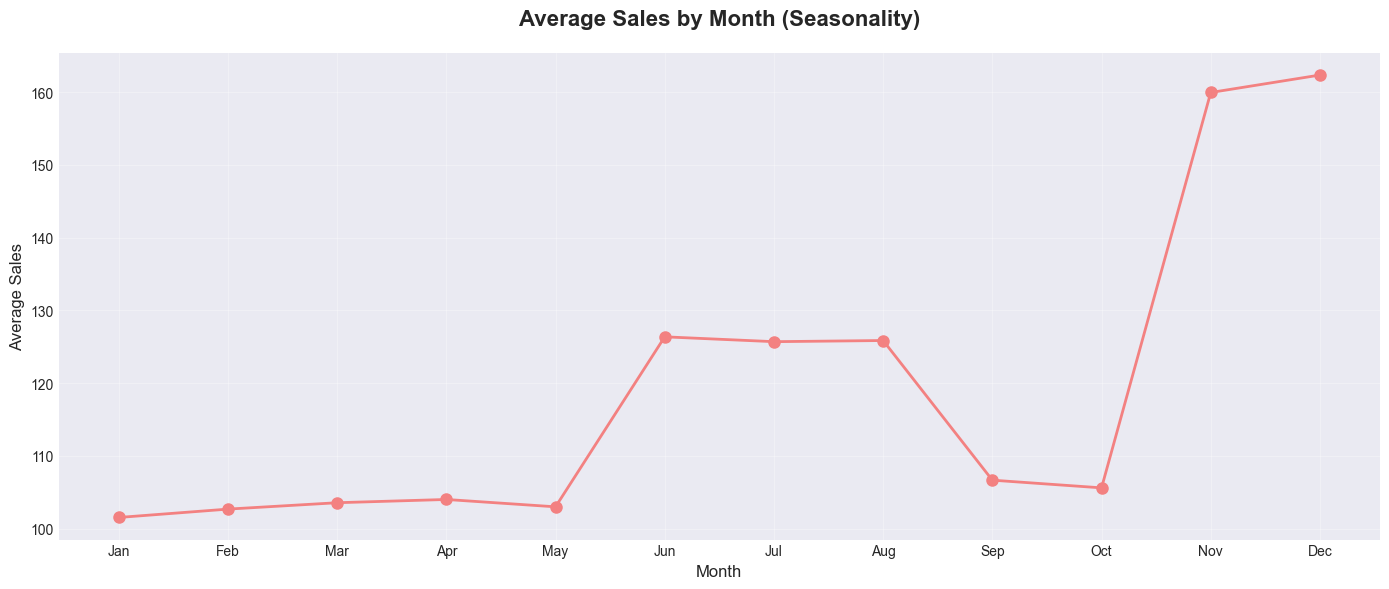

🏆 Peak Month: Month 12 (Avg: 162)
📉 Lowest Month: Month 1 (Avg: 102)


In [10]:
# Cell 10: Monthly Sales Pattern
monthly_sales = df.groupby('month')['sales'].mean()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(14, 6))
plt.plot(range(1, 13), monthly_sales, marker='o', linewidth=2, 
         markersize=8, color='#F38181')
plt.title('Average Sales by Month (Seasonality)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.xticks(range(1, 13), month_names)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"🏆 Peak Month: Month {monthly_sales.idxmax()} (Avg: {monthly_sales.max():.0f})")
print(f"📉 Lowest Month: Month {monthly_sales.idxmin()} (Avg: {monthly_sales.min():.0f})")

🏪 STORE TYPE ANALYSIS
                  mean      sum  count
store_type                            
Rural        82.966758  4542430  54750
Suburban    117.072571  7264353  62050
Urban       150.682040  9899810  65700


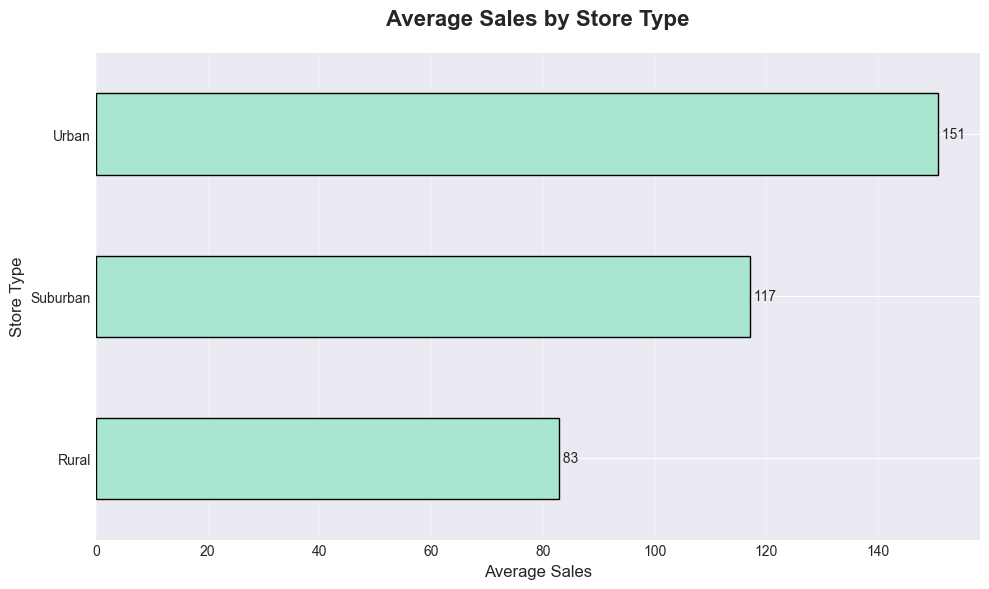

In [11]:
# Cell 11: Sales by Store Type
store_sales = df.groupby('store_type')['sales'].agg(['mean', 'sum', 'count'])

print("🏪 STORE TYPE ANALYSIS")
print("=" * 60)
print(store_sales)
print("=" * 60)

plt.figure(figsize=(10, 6))
store_sales['mean'].sort_values().plot(kind='barh', color='#A8E6CF', edgecolor='black')
plt.title('Average Sales by Store Type', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Average Sales', fontsize=12)
plt.ylabel('Store Type', fontsize=12)
plt.grid(axis='x', alpha=0.3)

for i, v in enumerate(store_sales['mean'].sort_values()):
    plt.text(v, i, f' {v:.0f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

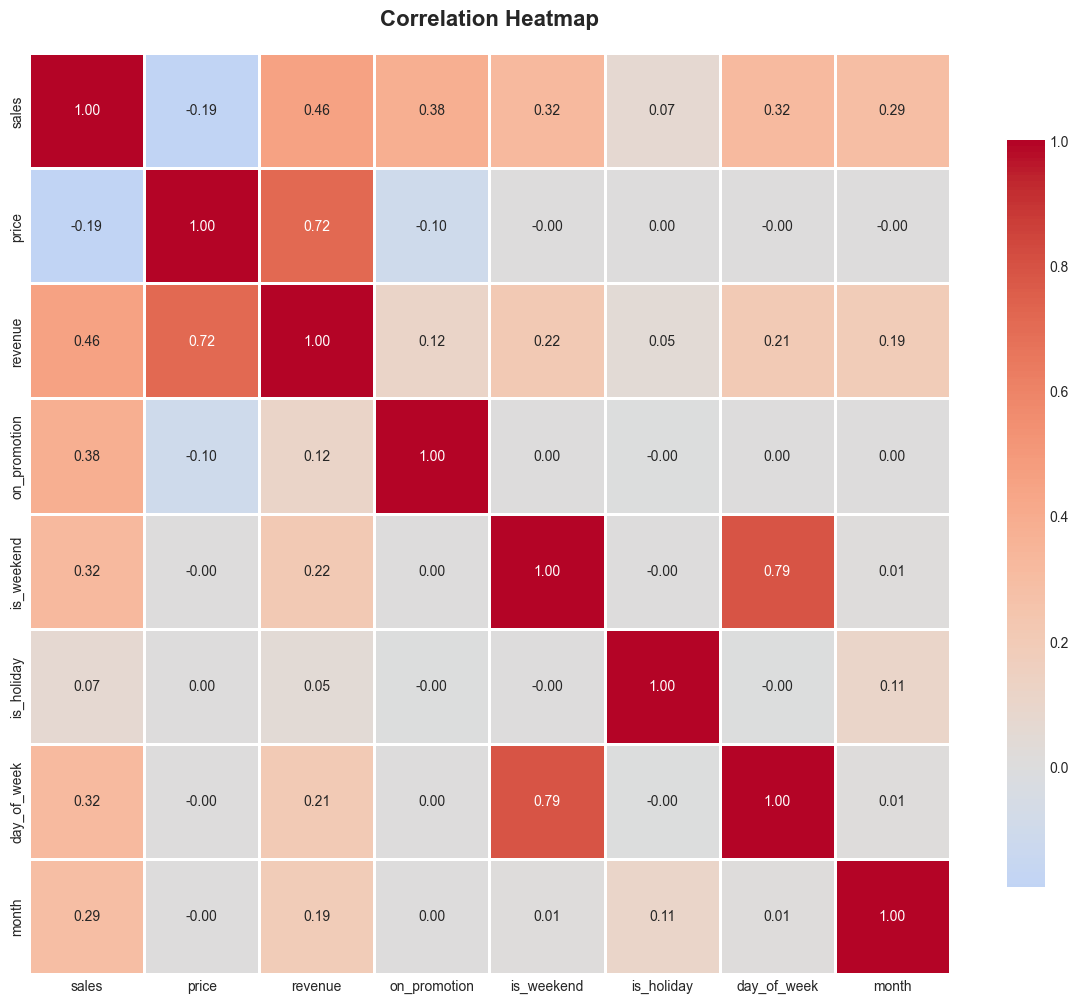


🔍 Key Insights:
✅ Sales-Revenue correlation: 0.46
✅ Promotion-Sales correlation: 0.38
✅ Weekend-Sales correlation: 0.32


In [12]:
# Cell 12: Correlation Analysis
numerical_cols = ['sales', 'price', 'revenue', 'on_promotion', 
                  'is_weekend', 'is_holiday', 'day_of_week', 'month']
correlation = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.2f', cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n🔍 Key Insights:")
print(f"✅ Sales-Revenue correlation: {correlation.loc['sales', 'revenue']:.2f}")
print(f"✅ Promotion-Sales correlation: {correlation.loc['on_promotion', 'sales']:.2f}")
print(f"✅ Weekend-Sales correlation: {correlation.loc['is_weekend', 'sales']:.2f}")

In [13]:
# Cell 13: Key Insights & Summary
print("=" * 80)
print("🎯 KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")
print("=" * 80)

print("\n📊 DATASET OVERVIEW:")
print(f"   • Total Records: {len(df):,}")
print(f"   • Date Range: {df['date'].min()} to {df['date'].max()}")
print(f"   • Products: {df['item_id'].nunique()}")
print(f"   • Stores: {df['store_id'].nunique()}")
print(f"   • Categories: {df['category'].nunique()}")

print("\n💰 SALES PATTERNS:")
print(f"   • Average Daily Sales: {df.groupby('date')['sales'].sum().mean():,.0f}")
print(f"   • Total Revenue: ${df['revenue'].sum():,.2f}")
print(f"   • Best Selling Category: {df.groupby('category')['sales'].sum().idxmax()}")

print("\n📈 BUSINESS INSIGHTS:")
top_category = df.groupby('category')['sales'].sum().idxmax()
print(f"   • {top_category} is the top-selling category")
best_day = df.groupby('day_name')['sales'].mean().idxmax()
print(f"   • {best_day} has the highest average sales")
print(f"   • Promotions increase sales by {lift:.1f}%")
urban_avg = df[df['store_type']=='Urban']['sales'].mean()
rural_avg = df[df['store_type']=='Rural']['sales'].mean()
print(f"   • Urban stores sell {((urban_avg/rural_avg - 1)*100):.0f}% more than Rural stores")

print("\n✅ NEXT STEPS:")
print("   1. Feature engineering for ML models")
print("   2. Build baseline forecasting model")
print("   3. Implement advanced models (LightGBM, Prophet, LSTM)")
print("   4. Develop API for real-time predictions")
print("=" * 80)

🎯 KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS

📊 DATASET OVERVIEW:
   • Total Records: 182,500
   • Date Range: 2023-01-01 00:00:00 to 2024-12-30 00:00:00
   • Products: 50
   • Stores: 5
   • Categories: 5

💰 SALES PATTERNS:
   • Average Daily Sales: 29,735
   • Total Revenue: $106,726,243.31
   • Best Selling Category: Vegetables

📈 BUSINESS INSIGHTS:
   • Vegetables is the top-selling category
   • Saturday has the highest average sales
   • Promotions increase sales by 60.5%
   • Urban stores sell 82% more than Rural stores

✅ NEXT STEPS:
   1. Feature engineering for ML models
   2. Build baseline forecasting model
   3. Implement advanced models (LightGBM, Prophet, LSTM)
   4. Develop API for real-time predictions
